# [Women's E-Commerce Clothing Reviews](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews?resource=download)

_23,000 Customer Reviews and Ratings_

![Women's E-Commerce Clothing Reviews](https://as2.ftcdn.net/v2/jpg/02/53/06/89/1000_F_253068911_91nB3eQZyDjC3yhLppa0OPG1OjfcmUIl.jpg)

In [198]:
# %conda install -q tensorflow plotly numpy pandas matplotlib scikit-learn kaleido psutil ipywidgets
%pip install -q tensorflow plotly numpy pandas matplotlib scikit-learn kaleido psutil ipywidgets jupyter-dash missingno

Note: you may need to restart the kernel to use updated packages.


## About Dataset
#### Context
Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

#### Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- __Clothing ID__: Integer Categorical variable that refers to the specific piece being reviewed.

- __Age__: Positive Integer variable of the reviewers age.

- __Title__: String variable for the title of the review.

- __Review Text__: String variable for the review body.

- __Rating__: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

- __Recommended IND__: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

- __Positive Feedback Count__: Positive Integer documenting the number of other customers who found this review positive.

- __Division Name__: Categorical name of the product high level division.

- __Department Name__: Categorical name of the product department name.

- __Class Name__: Categorical name of the product class name.

#### Acknowledgements
Anonymous but real source

#### Inspiration
I look forward to come quality NLP! There is also some great opportunities for feature engineering, and multivariate analysis.

#### Publications
_Statistical Analysis on E-Commerce Reviews, with Sentiment Classification using Bidirectional Recurrent Neural Network_


## 1. Import libraries

In [209]:
import pandas as pd
import numpy as np
import tensorflow as tf
import missingno as msno
import plotly

## 2. Exploratory Data Analysis and Data Cleaning
- Load Discover the Data

In [204]:
df = pd.read_csv('dataset/Womens Clothing E-Commerce Reviews.csv', index_col=0)
display(
    df.head(5)
)
df.info()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


- Missing Value Detection & Cleaning

Text(0.5, 1.0, 'Distribution of Missing Value')

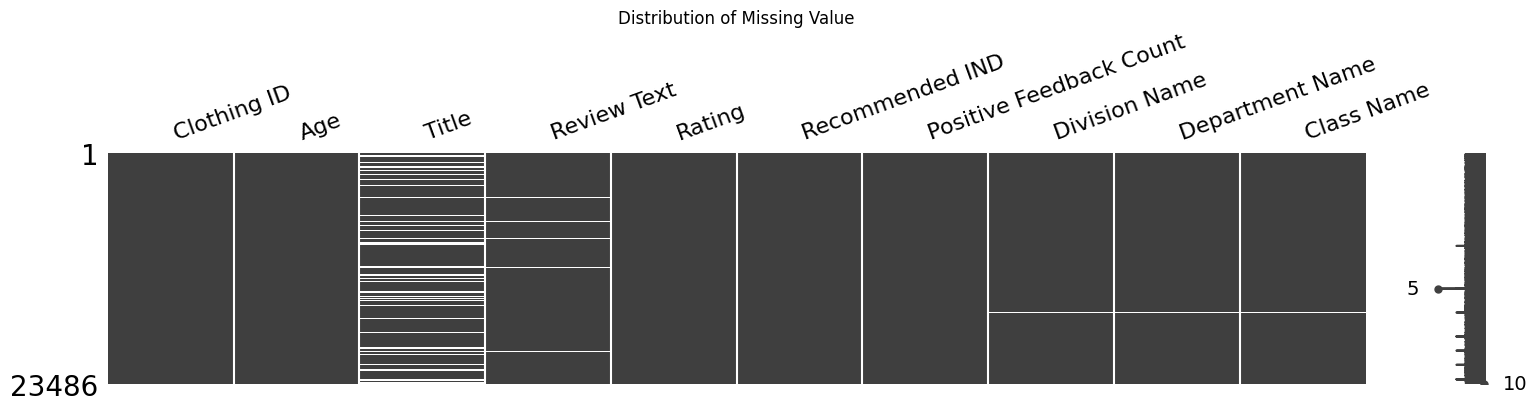

In [205]:
msno.matrix(df, figsize=(18, 3), label_rotation=20).set_title('Distribution of Missing Value')

In [206]:
review_length = []
df = df.dropna(subset = 'Review Text')

for i, review in enumerate(df['Review Text']):
    review_length.append(len(review))

display(
    np.max(review_length), np.min(review_length)
)

508

9

Text(0.5, 1.0, 'Distribution of Missing Value')

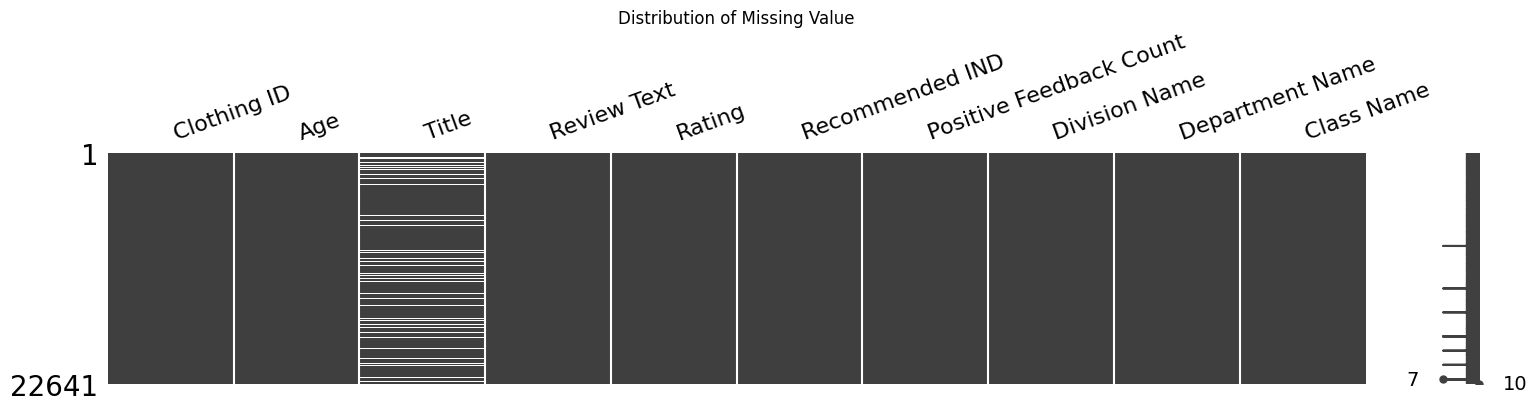

In [207]:
msno.matrix(df, figsize=(18, 3), label_rotation=20).set_title('Distribution of Missing Value')

In [208]:
df['Recommended IND'].value_counts(normalize=True)

Recommended IND
1    0.818868
0    0.181132
Name: proportion, dtype: float64

In [248]:
import plotly.graph_objects as go
import plotly.express as px

plot_data = df.groupby(['Recommended IND'])
plot_data = plot_data['Rating'].value_counts().reset_index(name='Count')

fig = go.Figure()

for ind in plot_data['Recommended IND'].unique():
    data = plot_data[plot_data['Recommended IND'] == ind]
    if ind == 0:
        _name = 'Negative'
        _color = '#F5195A'
    else:
        _name = 'Positive'
        _color = '#2CCC76'
        
    fig.add_trace(
        go.Bar(x=data['Rating'], y=data['Count'], 
               text=data['Count'], textposition='outside', 
               name=_name, marker_color=_color))
    
fig.update_layout(title='"Rating" by Recommended IND',
                  xaxis_title='Rating',
                  yaxis_title='Count',
                  barmode='group',
                  width=800,
                  height=600)

fig.show()



In [257]:
import plotly.graph_objects as go
import plotly.express as px

plot_data = df.groupby(['Recommended IND'])
plot_data = plot_data['Department Name'].value_counts().reset_index(name='Count')
plot_data = plot_data.sort_values(by='Count', ascending=True)
fig = go.Figure()

for ind in plot_data['Recommended IND'].unique():
    data = plot_data[plot_data['Recommended IND'] == ind]
    if ind == 0:
        _name = 'Negative'
        _color = '#F5195A'
    else:
        _name = 'Positive'
        _color = '#2CCC76'
        
    fig.add_trace(
        go.Bar(x=data['Department Name'], y=data['Count'], 
               text=data['Count'], textposition='outside', 
               name=_name, marker_color=_color))
    
fig.update_layout(title='Counts by Rating and Recommended IND',
                  xaxis_title='Rating',
                  yaxis_title='Count',
                  barmode='group',
                  width=800,
                  height=600)

fig.show()



In [256]:
import plotly.graph_objects as go
import plotly.express as px

plot_data = df.groupby(['Recommended IND'])
plot_data = plot_data['Class Name'].value_counts().reset_index(name='Count')
plot_data = plot_data.sort_values(by='Count', ascending=True)
fig = go.Figure()

for ind in plot_data['Recommended IND'].unique():
    data = plot_data[plot_data['Recommended IND'] == ind]
    if ind == 0:
        _name = 'Negative'
        _color = '#F5195A'
    else:
        _name = 'Positive'
        _color = '#2CCC76'
        
    fig.add_trace(
        go.Bar(x=data['Class Name'], y=data['Count'], 
               text=data['Count'], textposition='outside', 
               name=_name, marker_color=_color))
    
fig.update_layout(title='Counts by Rating and Recommended IND',
                  xaxis_title='Rating',
                  yaxis_title='Count',
                  barmode='group',
                  width=800,
                  height=600)

fig.show()



## 3. Feature Selection
- Feature Selection and Rename Column Name `Review Text` and `Recommended IND`

## 4. Text preprocessing

In [120]:
import re

start_char = 1
oov_char = 2
index_from = 3

_x = df['Review Text']\
            .map(lambda _str: re.sub('[^0-9a-zA-Z ]', '', _str).lower())\
            .map(lambda _str: _str.split())

word_to_idx = {}    
idx = 0

for phrase in _x:
    for word in phrase:
        if word_to_idx.get(word):
            continue
        else:
            word_to_idx[word] = idx
            idx += 1

x = []

for phrase in _x:
    encode = [start_char]
    
    for word in phrase:
        if _word := word_to_idx.get(word):
            encode.append(index_from + _word)
        else:
            encode.append(oov_char)
            
    x.append(encode)


y = df['Recommended IND']

x = pd.Series(x)
print(x.head(10), type(y))
print(y.head(10), type(y))

0                           [1, 779, 4, 5, 6, 7, 6, 8]
1    [1, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...
2    [1, 15, 53, 54, 55, 56, 57, 10, 11, 6, 58, 59,...
3    [1, 15, 9, 9, 9, 10, 106, 12, 107, 108, 6, 109...
4    [1, 10, 117, 51, 87, 118, 17, 119, 120, 17, 36...
5    [1, 15, 9, 132, 133, 134, 66, 10, 135, 51, 73,...
6    [1, 15, 164, 10, 20, 63, 165, 166, 167, 168, 1...
7    [1, 15, 30, 10, 20, 207, 57, 22, 175, 75, 6, 5...
8    [1, 15, 9, 10, 11, 15, 139, 113, 238, 189, 66,...
9    [1, 23, 245, 6, 246, 247, 15, 30, 36, 248, 32,...
dtype: object <class 'pandas.core.series.Series'>
0    1
1    1
2    0
3    1
4    1
5    0
6    1
7    1
8    1
9    1
Name: Recommended IND, dtype: int64 <class 'pandas.core.series.Series'>


In [102]:
import numpy as np


print(f'x: {len(_x)}')
print(f'categories: {len(set(word_to_idx))}')

x: 22641
categories: 21077


In [135]:
start_char = 1
oov_char = 2
index_from = 3

vocab_size = 21080 # categories 21077
sequence_length = 508 # max 508 
input_sequences = []
target_sequences = []

embedding_dim = 100
hidden_units = 128

batch_size = 64
epochs=15
validation_split=0.2

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

2023-05-31 05:04:45.541669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-31 05:04:45.545222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-31 05:04:45.548773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [128]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1892)

x_train = pad_sequences(x_train, maxlen=sequence_length)
x_test = pad_sequences(x_test, maxlen=sequence_length)

In [133]:
from tensorflow.keras.callbacks import TensorBoard

log_dir = 'logs/'
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('ckcp/GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=15, callbacks=[tb, es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15


2023-05-31 03:45:39.955358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-31 03:45:39.957402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-31 03:45:39.959251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - ETA: 0s - loss: 0.1711 - acc: 0.9345

2023-05-31 03:48:14.888988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-31 03:48:14.892013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-31 03:48:14.896378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus


Epoch 1: val_acc improved from -inf to 0.88049, saving model to ckcp/GRU_model.h5
227/227 [==============================] - 177s 772ms/step - loss: 0.1711 - acc: 0.9345 - val_loss: 0.2673 - val_acc: 0.8805
Epoch 2/15
227/227 [==============================] - ETA: 0s - loss: 0.1550 - acc: 0.9397

2023-05-31 03:53:38.419156: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 528000000 exceeds 10% of free system memory.



Epoch 2: val_acc improved from 0.88049 to 0.88380, saving model to ckcp/GRU_model.h5
227/227 [==============================] - 304s 1s/step - loss: 0.1550 - acc: 0.9397 - val_loss: 0.2847 - val_acc: 0.8838
Epoch 3/15
227/227 [==============================] - ETA: 0s - loss: 0.1414 - acc: 0.9479

2023-05-31 03:56:52.385651: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 528000000 exceeds 10% of free system memory.



Epoch 3: val_acc improved from 0.88380 to 0.88490, saving model to ckcp/GRU_model.h5
227/227 [==============================] - 192s 847ms/step - loss: 0.1414 - acc: 0.9479 - val_loss: 0.3332 - val_acc: 0.8849
Epoch 4/15
227/227 [==============================] - ETA: 0s - loss: 0.1306 - acc: 0.9527

2023-05-31 03:59:41.957914: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 528000000 exceeds 10% of free system memory.



Epoch 4: val_acc did not improve from 0.88490
227/227 [==============================] - 169s 744ms/step - loss: 0.1306 - acc: 0.9527 - val_loss: 0.3388 - val_acc: 0.8832
Epoch 5/15
227/227 [==============================] - ETA: 0s - loss: 0.1170 - acc: 0.9569

2023-05-31 04:02:24.392035: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 528000000 exceeds 10% of free system memory.



Epoch 5: val_acc did not improve from 0.88490
227/227 [==============================] - 162s 716ms/step - loss: 0.1170 - acc: 0.9569 - val_loss: 0.3233 - val_acc: 0.8728
Epoch 5: early stopping


In [142]:
load_model = load_model('ckcp/GRU_model.h5')
load_model.evaluate(x_test, y_test)

2023-05-31 05:44:14.420559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-31 05:44:14.426262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-31 05:44:14.432277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

142/142 [==============================] - 14s 93ms/step - loss: 0.3301 - acc: 0.8918


[0.33008432388305664, 0.8918083310127258]

In [162]:
def sentiment_predict(review, start_char=start_char, oov_char=oov_char, index_from=index_from, vocab_size=vocab_size):
    
    review = re.sub('[^0-9a-zA-Z ]', '', review).lower()
    
    encode = [start_char]
    for word in review:
        if idx := word_to_idx.get(word) and word_to_idx.get(word) <= vocab_size:
            encode.append(index_from + idx)
        else:
            encode.append(oov_char)
        
    x = pad_sequences([encode], maxlen=sequence_length)
    score = load_model.predict(x)
    return score

In [173]:
test_input = "I recently purchased a stunning Floral Pattern Print Dress and I must say, I am absolutely in love with it! The floral pattern is exquisitely designed, adding a touch of elegance and femininity to the dress. The colors are vibrant and the details of the print are beautifully intricate. The dress itself is made from high-quality fabric that feels soft and comfortable against the skin. The fit is perfect, hugging my curves in all the right places and accentuating my figure."
score = sentiment_predict(test_input)
print(f'score: {score}')

1/1 [==============================] - 0s 70ms/step
score: [[0.9999894]]


## Reference
[1] https://www.kaggle.com/code/clkmuhammed/womensclothingreviews-lstm-gru-bert-classification

[2] https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews?datasetId=11827&searchQuery=gru

[3] https://wikidocs.net/24586